In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Environment for performance testing

To make it more likely that we are all running our code in similar environments, if possible, please use Google Colab to run the performance experiments in this file.

## Three different dot product implementations

Implement the following three dot product functions:

* `dot_for_loop`: Use a for loop to compute the dot product
* `dot_numpy`: Use a numpy operation to compute the dot product
* `dot_sparse_for`: Leverage the sparse representation to compute the dot product


In [ ]:
def dot_for_loop(u, v):
    """
    Implement the dot product of vectors u and v **without** using numpy
    operations (other than indexing into the array). Specifically, use a for loop
    go through the values in the vectors.

    When testing performance below, make sure you don't have any print
    statements within this function.

    Input:
    u: NumPy ndarray shape (N,)
    v: NumPy ndarray shape (N,)

    Return:
    A floating point scalar value that is the dot product of u and v
    """
    N = len(u)
    assert u.shape == (N,)
    assert v.shape == (N,)

    ### BEGIN YOUR CODE ### Iterates through both vectors, multiplying corresponding elements and summing the results.

    dot_product = 0
    for i in range(N):
        dot_product += u[i] * v[i]

    return dot_product

    ### END YOUR CODE ###

def dot_numpy(u, v):
    """
    Implement the dot product of vectors u and v using numpy operations.
    Do not use any loops in your code. This should probably be only one line.

    When testing performance below, make sure you don't have any print
    statements within this function.

    Input:
    u: NumPy ndarray shape (N,)
    v: NumPy ndarray shape (N,)

    Return:
    A floating point scalar value that is the dot product of u and v
    """
    N = len(u)
    assert u.shape == (N,)
    assert v.shape == (N,)

    ### BEGIN YOUR CODE ### Leverages np.dot for efficient computation using optimized linear algebra libraries.

    return np.dot(u,v)

    ### END YOUR CODE ###

def dot_sparse_for(u_sparse, v):
    """
    Implement the dot product of the sparse vectors u and the dense vector v
    without using numpy/scipy operations (other than indexing into the array).
    Specifically, use a for loop as necessary.

    When testing performance below, make sure you don't have any print
    statements within this function.

    Input:
    u_sparse: A list of length K where each entry is a tuple of (index, value),
        where the corresponding full vector u whould have u[index] = value.
        The full vector vector u would be of length N and contain all zeros
        except for K entries specified by u_sparse. However, do **not**
        explicitly create this full length N u vector.
    v: NumPy ndarray shape (N,)

    Return:
    A floating point scalar value that is the dot product of u and v
    """
    ### BEGIN YOUR CODE ### Uses a sparse representation of u (a list of nonzero indices and values) to compute the dot product without constructing the full vector.

    dot_product = 0
    for index, value in u_sparse:
        dot_product += value * v[index]

    return dot_product

    ### END YOUR CODE ###


## Write any code here to check your methods above

This code will not affect your grade but it is certainly useful to make sure your methods are working.

In [ ]:
# Some example N=5 vectors that you can use with your test. You can (and should)
# test you code with others too

w = np.array([1.5, 2.5, 3.5, -4.0, 5.0])
z = np.array([2.0, 2.0, 2.0, 1.0,-1.0])
expected_w_dot_z = 1.5*2 + 2.5*2 + 3.5*2 - 4 - 5

u_full = np.array([0, 0, 3.5, -4.0, 0])
u_sparse = [(2, 3.5), (3, -4.0)] # Just two non-zero entries in u_full

# Example random vector
x = np.random.normal(size=5)

In [ ]:
# Example random sparse vector in both full and sparse formats

N=5
K=2

# Choose K random integers from 0 to N-1 without replacement
y_nonzero_indices = np.random.choice(N, size=K, replace=False)

# K random values to go with our K random locations
y_nonzero_values = np.random.normal(size=K)

y_sparse = []
for i in range(K):
    y_sparse.append((y_nonzero_indices[i], y_nonzero_values[i]))
# A very Python way to do the above code in one line using Python list comprehension
# y_sparse = [(u, v) for u, v in zip(u_indices, u_values)]

y_full = np.zeros(N)
for i in range(K):
    y_full[y_nonzero_indices[i]] =  y_nonzero_values[i]
# A very Numpy way to do the above code in one line (in addition to the np.zeros line)
y_full[y_nonzero_indices] = y_nonzero_values

In [ ]:
# Add as many correctness test cells as you'd like


## Performance testing

Implement the following three experiments to analyze the performance of the dot product implementations above.

* Experiment 1: Get an empirical estimate of the computational complexity of the numpy implementation with respect to the length of the vectors
* Experiment 2: Compare performance of the for-loop and numpy implementations as the length of the vectors changes
* Experiment 3: Compare performance of the numpy and sparse-for-loop implementations as the length of the vectors changes

Be sure to label your plot.

You can use `np.random.normal(size=N)` to fill create a length N vector with random numbers from a normal distribution.

**Important**: To ensure that each performance test is working with a new piece of memory and new values, create new random vectors before any call to our `dot_*` methods.

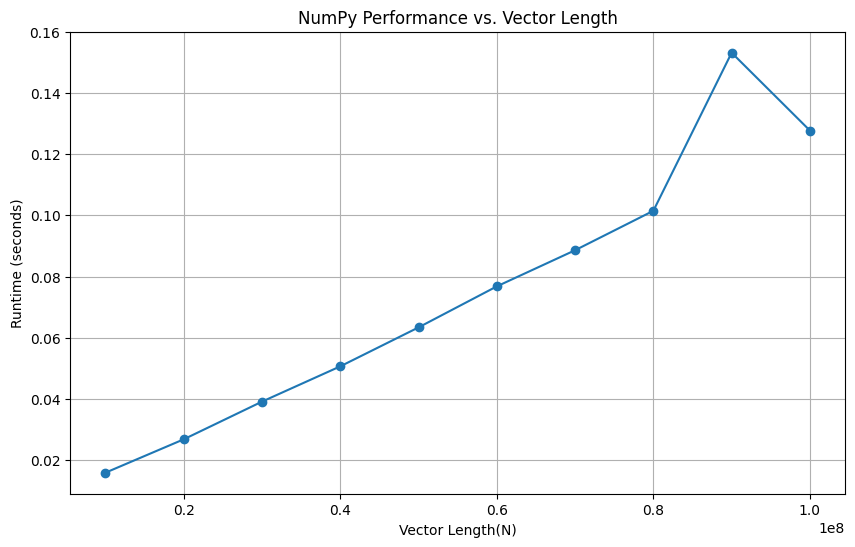

In [ ]:
"""
Experiment 1
Plot numpy performance vs N

For values N = 10,000,000 to 100,000,000 in increments of 10,000,000,
plot the time it takes to execute the line dot_numpy(u,v) where u and v
are vectors filled with N random numbers each.
"""

# List of values for N from 1e7 to 1e8 in increments of 1e7
N_values = [a*10**7 for a in range(1,11)]

### BEGIN YOUR CODE ###
numpy_times = []

for N in N_values:
    u = np.random.rand(N)
    v = np.random.rand(N)

    start_time = time.time()
    dot_numpy(u, v)
    end_time = time.time()

    numpy_times.append(end_time - start_time)

#Required Plots
plt.figure(figsize = (10,6))
plt.plot(N_values, numpy_times, marker = 'o')
plt.xlabel('Vector Length(N)')
plt.ylabel('Runtime (seconds)')
plt.title('NumPy Performance vs. Vector Length')
plt.grid(True)
plt.show()

### END YOUR CODE ###

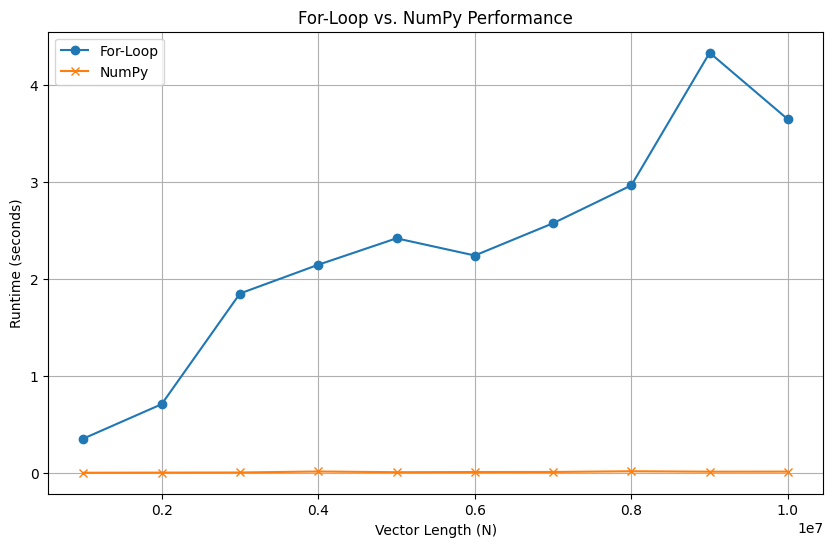

In [ ]:
"""
Experiment 2
Plot for-loop and numpy performance vs N

For values N = 1,000,000 to 10,000,000 in increments of 1,000,000,
(note the different range from experiment 1)
create one plot that compares the times it takes to execute dot_numpy(u,v) and
dot_for_loop(w, z) where u, v, w, z are four different vectors filled with N
random numbers each.

*** For a fair comparison, make sure u, v, w, and z are all different random
vectors. Of course the resulting answers for this two methods won't be the
same, but we care about comparing performance here (you should have already
checked correctness in your earlier tests).
These should also be completely new random vectors for each value of N.

"""

# List of values for N from 1e6 to 1e7 in increments of 1e6
N_values = [a*10**6 for a in range(1,11)]

### BEGIN YOUR CODE ###

for_loop_times = []
numpy_times = []

for N in N_values:
  u = np.random.rand(N)
  v = np.random.rand(N)
  w = np.random.rand(N)
  z = np.random.rand(N)

  # For-loop dot product
  start_time = time.time()
  dot_for_loop(w,z)
  end_time = time.time()
  for_loop_times.append(end_time - start_time)

  #NumPy dot product
  start_time = time.time()
  dot_numpy(u,v)
  end_time = time.time()
  numpy_times.append(end_time - start_time)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(N_values, for_loop_times, label='For-Loop', marker='o')
plt.plot(N_values, numpy_times, label='NumPy', marker='x')
plt.xlabel('Vector Length (N)')
plt.ylabel('Runtime (seconds)')
plt.title('For-Loop vs. NumPy Performance')
plt.legend()
plt.grid(True)
plt.show()

### END YOUR CODE ###


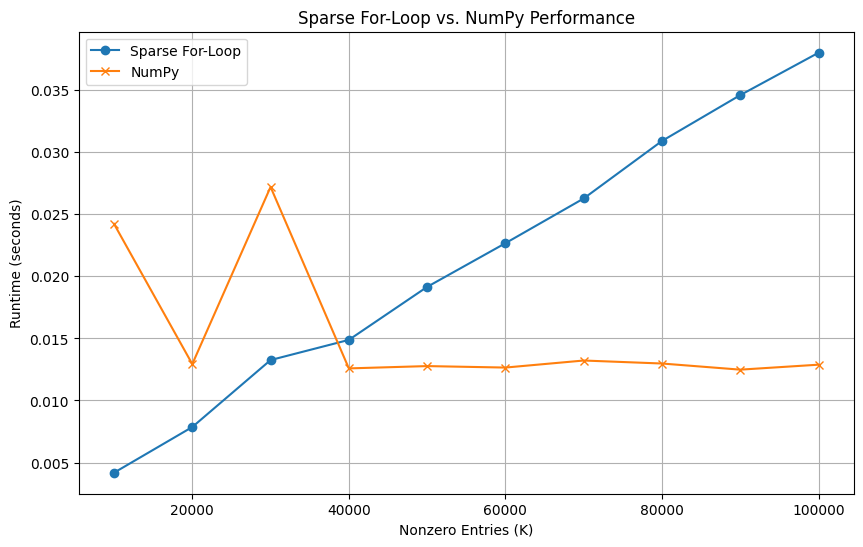

In [ ]:
"""
Experiment 3
Plot sparse-for-loop and numpy performance vs K (not N)

For values K = 10,000 to 100,000 in increments of 10,000
and a fixed value of N = 10,000,000, create one plot that compares the times it
takes to execute dot_sparse_for(u_sparse,v) and dot_numpy(w_full, z) where:
--- v, z are two different dense vectors filled with N random numbers each
--- u_sparse is our sparse representation of a length N vector with only
    K nonzeros. The K nonzeros should be random values in K random locations
--- w_full is another length N vector with only K nonzeros. However, w_full is
    a length N NumPy array (with N-K zeros). Like u_sparse, the K nonzeros
    should be random values in K random locations

*** Like Experiment 2, for a fair comparison, make sure u_sparse, v, w_full,
and z are all different random vectors. These should also be completely new
random vectors for each value of N.

"""
K_values = [a*10**4 for a in range(1,11)]
N = 10**7

### BEGIN YOUR CODE ###
sparse_times = []
numpy_times = []

for K in K_values:
  #sparse vector
  indices = np.random.choice(N,K, replace = False)
  values = np.random.rand(K)
  u_sparse = list(zip(indices,values))

  #Generating dense vectors
  v = np.random.rand(N)
  w_full = np.zeros(N)
  w_full[indices] = values
  z = np.random.rand(N)

  #Sparse-for-loop dot product
  start_time = time.time()
  dot_sparse_for(u_sparse,v)
  end_time = time.time()
  sparse_times.append(end_time - start_time)

  #NumPy dot product
  start_time = time.time()
  dot_numpy(w_full,z)
  end_time = time.time()
  numpy_times.append(end_time - start_time)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(K_values, sparse_times, label='Sparse For-Loop', marker='o')
plt.plot(K_values, numpy_times, label='NumPy', marker='x')
plt.xlabel('Nonzero Entries (K)')
plt.ylabel('Runtime (seconds)')
plt.title('Sparse For-Loop vs. NumPy Performance')
plt.legend()
plt.grid(True)
plt.show()

### END YOUR CODE ###


## Submisson

1. Answer the associated questions and include your plots in the written component of this homework.
2. Save this notebook as `vector.ipynb` and submit this as part of the programming component of this homework on Gradescope. Note there are no autograder tests associated with this submitted file on Gradescope. We just need to see the code for your dot product implementations and your experiments.